In [2]:
import pickle
#with open('/path/to/your/file/jsb-chorales-16th.pkl', 'rb') as p:
with open('/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/JSB-Chorales-dataset-master/jsb-chorales-16th.pkl', 'rb') as p:
    data = pickle.load(p, encoding="latin1")

In [ ]:
import numpy as np
import os

# Print current working directory (to verify file location)
print("Current working directory:", os.getcwd())


# Check the type of the data
print("Type of loaded data:", type(data))

# If the data is a dictionary, list the keys and number of items in each.
if isinstance(data, dict):
    for key, value in data.items():
        print(f"Key: {key}, Number of chorales: {len(value)}")
elif isinstance(data, list):
    print("Number of chorales in dataset:", len(data))

Current working directory: /Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS
Type of loaded data: <class 'collections.defaultdict'>
Key: test, Number of chorales: 77
Key: train, Number of chorales: 229
Key: valid, Number of chorales: 76
Key: 0, Number of chorales: 0


In [ ]:
import numpy as np

# Initialize a variable for a valid chorale.
chosen = None

if isinstance(data, list):
    for i, chor in enumerate(data):
        chor_array = np.array(chor)
        # Print the shape to inspect it
        print(f"Chorale {i} shape: {chor_array.shape}")
        # Check for a valid chorale shape (ensure it is 2D and not empty)
        if chor_array.ndim == 2 and chor_array.size != 0:
            chosen = chor_array
            print(f"Using chorale {i} for visualization.")
            break
elif isinstance(data, dict):
    # For example, use the 'train' key if it exists.
    for key in data:
        for i, chor in enumerate(data[key]):
            chor_array = np.array(chor)
            print(f"Chorale {i} in {key} shape: {chor_array.shape}")
            if chor_array.ndim == 2 and chor_array.size != 0:
                chosen = chor_array
                print(f"Using chorale {i} from '{key}' for visualization.")
                break
        if chosen is not None:
            break

if chosen is None:
    raise ValueError("No suitable chorale found for visualization.")

Chorale 0 in test shape: (228, 4)
Using chorale 0 from 'test' for visualization.


First 5 rows of the selected chorale:
[[65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [72 60 55 52]]


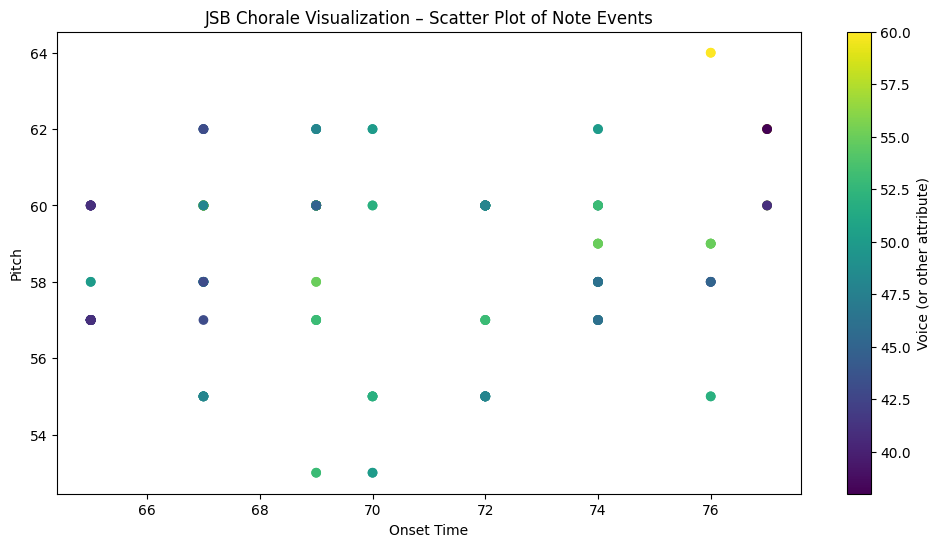

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os


# Select chorale 0 from the 'test' key
chorale = data['test'][0]  # chorale shape: (228, 4)
chorale_array = np.array(chorale)

# (Optional) Print the first few rows to verify the columns
print("First 5 rows of the selected chorale:")
print(chorale_array[:5])

# Create a scatter plot
plt.figure(figsize=(12, 6))
# Using column 0 (onset) as x, column 2 (pitch) as y, and column 3 for color coding
sc = plt.scatter(chorale_array[:, 0], chorale_array[:, 2], c=chorale_array[:, 3], cmap='viridis', marker='o')
plt.xlabel('Onset Time')
plt.ylabel('Pitch')
plt.title('JSB Chorale Visualization – Scatter Plot of Note Events')
plt.colorbar(sc, label='Voice (or other attribute)')
plt.show()

First 5 rows of the selected chorale:
[[65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [65 60 57 53]
 [72 60 55 52]]


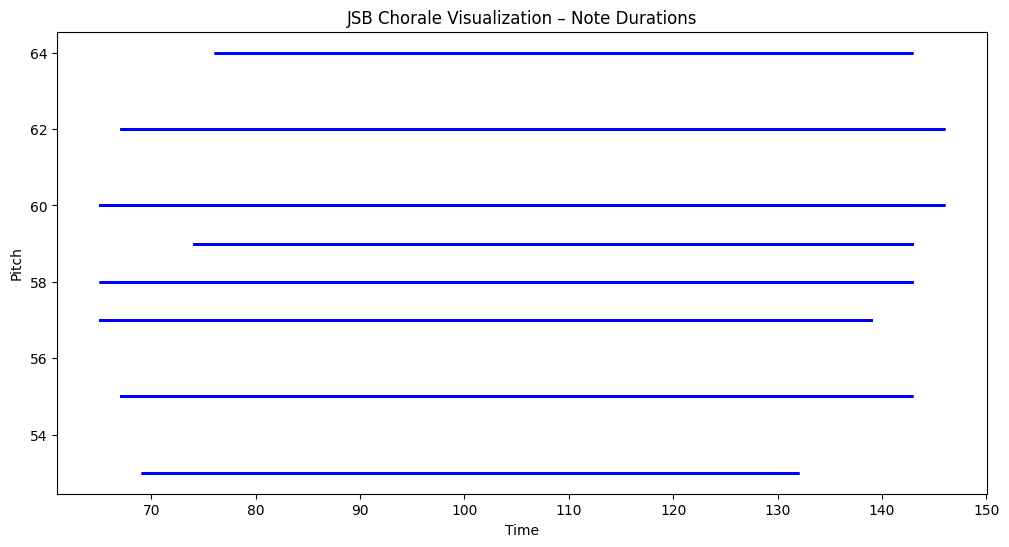

In [7]:

import numpy as np
import matplotlib.pyplot as plt



# Select chorale 0 from the 'test' key
chorale = data['test'][0]  # chorale shape: (228, 4)
chorale_array = np.array(chorale)

# (Optional) Print the first few rows to verify the columns
print("First 5 rows of the selected chorale:")
print(chorale_array[:5])

# Extract columns (adjust these indices if your column meanings differ)
onset   = chorale_array[:, 0]
duration = chorale_array[:, 1]
pitch   = chorale_array[:, 2]
# column 3 is available for additional use (e.g. voice) if desired

plt.figure(figsize=(12, 6))
for o, d, p in zip(onset, duration, pitch):
    # Plot a horizontal line from the onset time to onset + duration at the given pitch
    plt.hlines(p, o, o + d, colors='b', lw=2)

plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('JSB Chorale Visualization – Note Durations')
plt.show()

In [8]:
!pip install pretty_midi

In [13]:
import pretty_midi
import os

# # Set the input JSON file (adjust path if necessary)
# json_file = 'jsb-chorales-16th.json'

# # Load the chorale data from JSON
# with open(json_file, 'r') as f:
#     data = json.load(f)

# Specify the output folder for MIDI files
output_dir = "midi_outputs"

# Create the folder if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set a fixed chord duration in seconds; adjust to control the tempo.
chord_duration = 0.5

# Loop through each dataset partition (e.g., 'test', 'train', 'valid')
for subset, chorales in data.items():
    print(f"Processing subset: {subset} with {len(chorales)} chorales...")
    # For each chorale in the current subset...
    for i, chorale in enumerate(chorales):
        # Create a PrettyMIDI object for the current chorale.
        pm = pretty_midi.PrettyMIDI()

        # Create an instrument for each voice (SATB) using a choir patch.
        soprano = pretty_midi.Instrument(program=52)
        alto = pretty_midi.Instrument(program=52)
        tenor = pretty_midi.Instrument(program=52)
        bass = pretty_midi.Instrument(program=52)

        start_time = 0.0  # starting time in seconds

        # Each chord is a list of four numbers [Soprano, Alto, Tenor, Bass]
        for chord in chorale:
            # Ensure there are four elements to unpack.
            if len(chord) < 4:
                continue
            sop_pitch, alt_pitch, ten_pitch, bas_pitch = chord[:4]

            # Cast the pitches to int if they are not already
            sop_pitch = int(sop_pitch)
            alt_pitch = int(alt_pitch)
            ten_pitch = int(ten_pitch)
            bas_pitch = int(bas_pitch)

            # Create a note for each voice.
            sop_note = pretty_midi.Note(velocity=100, pitch=sop_pitch,
                                        start=start_time, end=start_time + chord_duration)
            alt_note = pretty_midi.Note(velocity=100, pitch=alt_pitch,
                                        start=start_time, end=start_time + chord_duration)
            ten_note = pretty_midi.Note(velocity=100, pitch=ten_pitch,
                                        start=start_time, end=start_time + chord_duration)
            bas_note = pretty_midi.Note(velocity=100, pitch=bas_pitch,
                                        start=start_time, end=start_time + chord_duration)

            # Add the notes to the respective instruments.
            soprano.notes.append(sop_note)
            alto.notes.append(alt_note)
            tenor.notes.append(ten_note)
            bass.notes.append(bas_note)

            # Advance the time by the chord duration.
            start_time += chord_duration

        # Add the instruments to the PrettyMIDI object.
        pm.instruments.extend([soprano, alto, tenor, bass])

        # Construct a filename such as "test_chorale_0.mid"
        midi_filename = os.path.join(output_dir, f"{subset}_chorale_{i}.mid")
        pm.write(midi_filename)
        print(f"Written {midi_filename}")

print("All MIDI files have been created and placed in the folder:", output_dir)

Processing subset: test with 77 chorales...
Written midi_outputs/test_chorale_0.mid
Written midi_outputs/test_chorale_1.mid
Written midi_outputs/test_chorale_2.mid
Written midi_outputs/test_chorale_3.mid
Written midi_outputs/test_chorale_4.mid
Written midi_outputs/test_chorale_5.mid
Written midi_outputs/test_chorale_6.mid
Written midi_outputs/test_chorale_7.mid
Written midi_outputs/test_chorale_8.mid
Written midi_outputs/test_chorale_9.mid
Written midi_outputs/test_chorale_10.mid
Written midi_outputs/test_chorale_11.mid
Written midi_outputs/test_chorale_12.mid
Written midi_outputs/test_chorale_13.mid
Written midi_outputs/test_chorale_14.mid
Written midi_outputs/test_chorale_15.mid
Written midi_outputs/test_chorale_16.mid
Written midi_outputs/test_chorale_17.mid
Written midi_outputs/test_chorale_18.mid
Written midi_outputs/test_chorale_19.mid
Written midi_outputs/test_chorale_20.mid
Written midi_outputs/test_chorale_21.mid
Written midi_outputs/test_chorale_22.mid
Written midi_outputs/te

Selected MIDI file: train_chorale_226.mid


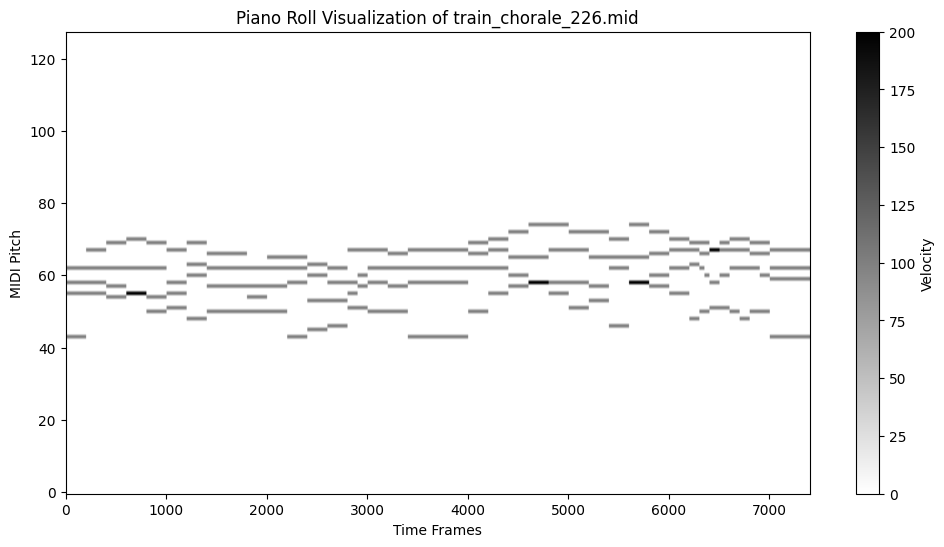

In [4]:
import os
import random
import pretty_midi
import matplotlib.pyplot as plt

# Specify the folder where your MIDI files are stored.
midi_folder = "/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/midi_outputs"

# Get all MIDI files in the folder.
midi_files = [f for f in os.listdir(midi_folder) if f.lower().endswith(".mid")]

if not midi_files:
    raise FileNotFoundError("No MIDI files found in the specified folder.")

# Randomly choose one MIDI file.
selected_file = random.choice(midi_files)
file_path = os.path.join(midi_folder, selected_file)
print(f"Selected MIDI file: {selected_file}")

# Load the selected MIDI file with PrettyMIDI.
pm = pretty_midi.PrettyMIDI(file_path)

# Generate a piano roll for visualization.
# fs sets the frame rate; adjust if necessary.
piano_roll = pm.get_piano_roll(fs=100)

# Plot the piano roll.
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll, aspect="auto", origin="lower", cmap="gray_r")
plt.xlabel("Time Frames")
plt.ylabel("MIDI Pitch")
plt.title(f"Piano Roll Visualization of {selected_file}")
plt.colorbar(label="Velocity")
plt.show()

In [1]:
import json

# Load the raw JSON file from JSB Chorales dataset.
with open("/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/JSB-Chorales-dataset-master/jsb-chorales-16th.json", "r") as file:
    data = json.load(file)

# Assuming the dataset is stored under the key "test"
chorales = data["test"]

# Prepare lists to hold the separated parts
soprano_voices = []  # S part for each chorale
atb_parts = []       # Combined ATB parts for each chorale

# Iterate through each chorale (each chorale is a paragraph)
for chorale in chorales:
    s_voice = []  # Collect Soprano notes for this chorale
    atb = []      # Collect Alto, Tenor, Bass notes for this chorale
    for timestep in chorale:
        if len(timestep) >= 4:
            s_voice.append(timestep[0])      # First element: Soprano
            atb.append(timestep[1:4])          # Next three: ATB
    soprano_voices.append(s_voice)
    atb_parts.append(atb)

# Save the separated parts as JSON files
with open("soprano_voices.json", "w") as s_file:
    json.dump(soprano_voices, s_file, indent=2)

with open("atb_parts.json", "w") as atb_file:
    json.dump(atb_parts, atb_file, indent=2)

print("Files 'soprano_voices.json' and 'atb_parts.json' have been created successfully.")

Files 'soprano_voices.json' and 'atb_parts.json' have been created successfully.


In [2]:
import os
import json

# Load previously created JSON files.
with open("/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/soprano_voices.json", "r") as sp_file:
    soprano_data = json.load(sp_file)

with open("/Users/cui/Documents/GitHub/MIDI-Harmonization-LCZS/atb_parts.json", "r") as atb_file:
    atb_data = json.load(atb_file)

# Create directories to hold per-chorale paragraphs if they don't exist.
soprano_folder = "soprano_paragraphs"
atb_folder = "atb_paragraphs"
os.makedirs(soprano_folder, exist_ok=True)
os.makedirs(atb_folder, exist_ok=True)

# Write each paragraph (chorale) into a separate JSON file.
for i, paragraph in enumerate(soprano_data, start=1):
    filename = os.path.join(soprano_folder, f"paragraph_{i}.json")
    with open(filename, "w") as f:
        json.dump(paragraph, f, indent=2)

for i, paragraph in enumerate(atb_data, start=1):
    filename = os.path.join(atb_folder, f"paragraph_{i}.json")
    with open(filename, "w") as f:
        json.dump(paragraph, f, indent=2)

print("Paragraph files have been created in 'soprano_paragraphs' and 'atb_paragraphs'.")

Paragraph files have been created in 'soprano_paragraphs' and 'atb_paragraphs'.


In [3]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence

class ChoraleDataset(Dataset):
    def __init__(self, soprano_folder, atb_folder):
        # List JSON files in the folders and sort (to ensure alignment)
        self.soprano_files = sorted([os.path.join(soprano_folder, f) 
                                     for f in os.listdir(soprano_folder) if f.endswith('.json')])
        self.atb_files = sorted([os.path.join(atb_folder, f) 
                                 for f in os.listdir(atb_folder) if f.endswith('.json')])
        assert len(self.soprano_files) == len(self.atb_files), "Mismatch between soprano and atb files."
    
    def __len__(self):
        return len(self.soprano_files)
    
    def __getitem__(self, idx):
        with open(self.soprano_files[idx], 'r') as f:
            soprano = json.load(f)
        with open(self.atb_files[idx], 'r') as f:
            atb = json.load(f)
        # Convert lists to tensors
        soprano_tensor = torch.tensor(soprano, dtype=torch.long)
        atb_tensor = torch.tensor(atb, dtype=torch.long)  # Expected shape: [seq_length, 3]
        return {'soprano': soprano_tensor, 'atb': atb_tensor}

def collate_fn(batch):
    sopranos = [sample['soprano'] for sample in batch]
    atbs = [sample['atb'] for sample in batch]
    padded_soprano = pad_sequence(sopranos, batch_first=True, padding_value=0)
    padded_atb = pad_sequence(atbs, batch_first=True, padding_value=0)
    return {'soprano': padded_soprano, 'atb': padded_atb}

# Create the dataset instance.
dataset = ChoraleDataset("soprano_paragraphs", "atb_paragraphs")
print(f"Total paragraphs (samples): {len(dataset)}")

Total paragraphs (samples): 77


In [4]:
from torch.utils.data import random_split

total_size = len(dataset)
test_size = int(0.05 * total_size)
val_size = int(0.20 * total_size)
train_size = total_size - val_size - test_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")

Train samples: 59, Validation samples: 15, Test samples: 3


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define special tokens.
PAD_TOKEN = 0
SOS_TOKEN = 128  # Assumes valid MIDI notes are in 0-127.
INPUT_VOCAB_SIZE = 129   # 0..128
OUTPUT_VOCAB_SIZE = 129  # same for ATB voices
EMBED_DIM = 64
HIDDEN_SIZE = 128
NUM_LAYERS = 1
TEACHER_FORCING_RATIO = 0.5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ----- Encoder -----
class Encoder(nn.Module):
    def __init__(self, input_vocab_size, embed_dim, hidden_size, num_layers=1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers, batch_first=True)
    
    def forward(self, input_seq):
        embedded = self.embedding(input_seq)  # [batch_size, seq_len, embed_dim]
        outputs, (hidden, cell) = self.lstm(embedded)
        return hidden, cell

# ----- Decoder -----
class Decoder(nn.Module):
    def __init__(self, output_vocab_size, embed_dim, hidden_size, num_layers=1):
        super(Decoder, self).__init__()
        # Separate embeddings for Alto, Tenor, Bass.
        self.embed_alto = nn.Embedding(output_vocab_size, embed_dim)
        self.embed_tenor = nn.Embedding(output_vocab_size, embed_dim)
        self.embed_bass = nn.Embedding(output_vocab_size, embed_dim)
        # LSTM takes a concatenated embedding (3 * embed_dim)
        self.lstm = nn.LSTM(3 * embed_dim, hidden_size, num_layers, batch_first=True)
        # Separate linear layers for each voice.
        self.fc_alto = nn.Linear(hidden_size, output_vocab_size)
        self.fc_tenor = nn.Linear(hidden_size, output_vocab_size)
        self.fc_bass = nn.Linear(hidden_size, output_vocab_size)
    
    def forward(self, input_triple, hidden, cell):
        # Each input token is of shape [batch_size]; add time dimension.
        alto = input_triple[0].unsqueeze(1)
        tenor = input_triple[1].unsqueeze(1)
        bass = input_triple[2].unsqueeze(1)
        emb_alto = self.embed_alto(alto)
        emb_tenor = self.embed_tenor(tenor)
        emb_bass = self.embed_bass(bass)
        # Concatenate embeddings along last dimension.
        combined = torch.cat([emb_alto, emb_tenor, emb_bass], dim=2)
        output, (hidden, cell) = self.lstm(combined, (hidden, cell))
        alto_pred = self.fc_alto(output.squeeze(1))
        tenor_pred = self.fc_tenor(output.squeeze(1))
        bass_pred = self.fc_bass(output.squeeze(1))
        return (alto_pred, tenor_pred, bass_pred), hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        batch_size = src.size(0)
        trg_len = trg.size(1)
        output_vocab_size = self.decoder.fc_alto.out_features
        
        outputs_alto = torch.zeros(batch_size, trg_len, output_vocab_size).to(self.device)
        outputs_tenor = torch.zeros(batch_size, trg_len, output_vocab_size).to(self.device)
        outputs_bass = torch.zeros(batch_size, trg_len, output_vocab_size).to(self.device)
        
        hidden, cell = self.encoder(src)
        
        input_alto = torch.full((batch_size,), SOS_TOKEN, dtype=torch.long).to(self.device)
        input_tenor = torch.full((batch_size,), SOS_TOKEN, dtype=torch.long).to(self.device)
        input_bass  = torch.full((batch_size,), SOS_TOKEN, dtype=torch.long).to(self.device)
        
        for t in range(trg_len):
            output, hidden, cell = self.decoder((input_alto, input_tenor, input_bass), hidden, cell)
            alto_pred, tenor_pred, bass_pred = output
            outputs_alto[:, t, :] = alto_pred
            outputs_tenor[:, t, :] = tenor_pred
            outputs_bass[:, t, :] = bass_pred
            
            # Here we compute teacher forcing decision per time step.
            # You might implement a scheduled teacher forcing ratio (for example, reducing it over epochs).
            teacher_force = (torch.rand(1).item() < teacher_forcing_ratio)
            
            target_tokens = trg[:, t, :]  # [batch_size, 3]
            if teacher_force:
                # Use the ground-truth tokens.
                input_alto = target_tokens[:, 0]
                input_tenor = target_tokens[:, 1]
                input_bass = target_tokens[:, 2]
            else:
                # Otherwise, feed in the model's own predictions.
                input_alto = alto_pred.argmax(dim=1)
                input_tenor = tenor_pred.argmax(dim=1)
                input_bass = bass_pred.argmax(dim=1)
        
        return outputs_alto, outputs_tenor, outputs_bass

# Initialize model, optimizer, and criterion.
encoder = Encoder(INPUT_VOCAB_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_LAYERS).to(DEVICE)
decoder = Decoder(OUTPUT_VOCAB_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_LAYERS).to(DEVICE)
model = Seq2Seq(encoder, decoder, DEVICE).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=0.001)
# Use ignore_index for PAD tokens in loss.
criterion = nn.CrossEntropyLoss(ignore_index=PAD_TOKEN)

In [6]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_dataloader:
        src = batch['soprano'].to(DEVICE)       # [batch_size, seq_len]
        trg = batch['atb'].to(DEVICE)             # [batch_size, seq_len, 3]
        
        optimizer.zero_grad()
        outputs_alto, outputs_tenor, outputs_bass = model(src, trg, teacher_forcing_ratio=TEACHER_FORCING_RATIO)
        
        batch_size, seq_len, vocab_size = outputs_alto.shape
        out_alto = outputs_alto.reshape(-1, vocab_size)
        out_tenor = outputs_tenor.reshape(-1, vocab_size)
        out_bass = outputs_bass.reshape(-1, vocab_size)
        
        trg_alto = trg[:, :, 0].reshape(-1)
        trg_tenor = trg[:, :, 1].reshape(-1)
        trg_bass = trg[:, :, 2].reshape(-1)
        
        loss_alto = criterion(out_alto, trg_alto)
        loss_tenor = criterion(out_tenor, trg_tenor)
        loss_bass = criterion(out_bass, trg_bass)
        loss = loss_alto + loss_tenor + loss_bass
        
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss/len(train_dataloader):.4f}")

Epoch 1/10 Loss: 13.1028
Epoch 2/10 Loss: 8.5553
Epoch 3/10 Loss: 7.4748
Epoch 4/10 Loss: 7.0679
Epoch 5/10 Loss: 6.6718
Epoch 6/10 Loss: 6.3616
Epoch 7/10 Loss: 6.0878
Epoch 8/10 Loss: 5.8771
Epoch 9/10 Loss: 5.7027
Epoch 10/10 Loss: 5.4993


In [7]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss_alto = 0
    total_loss_tenor = 0
    total_loss_bass = 0
    total_batches = 0

    with torch.no_grad():
        for batch in dataloader:
            src = batch['soprano'].to(device)     # [batch_size, seq_len]
            trg = batch['atb'].to(device)           # [batch_size, seq_len, 3]
            outputs_alto, outputs_tenor, outputs_bass = model(src, trg, teacher_forcing_ratio=0.0)
            batch_size, seq_len, vocab_size = outputs_alto.shape
            out_alto = outputs_alto.reshape(-1, vocab_size)
            out_tenor = outputs_tenor.reshape(-1, vocab_size)
            out_bass = outputs_bass.reshape(-1, vocab_size)
            trg_alto = trg[:, :, 0].reshape(-1)
            trg_tenor = trg[:, :, 1].reshape(-1)
            trg_bass = trg[:, :, 2].reshape(-1)
            loss_alto = criterion(out_alto, trg_alto)
            loss_tenor = criterion(out_tenor, trg_tenor)
            loss_bass = criterion(out_bass, trg_bass)
            total_loss_alto += loss_alto.item()
            total_loss_tenor += loss_tenor.item()
            total_loss_bass += loss_bass.item()
            total_batches += 1

    avg_loss_alto = total_loss_alto / total_batches
    avg_loss_tenor = total_loss_tenor / total_batches
    avg_loss_bass = total_loss_bass / total_batches
    print(f"Validation Loss - Alto: {avg_loss_alto:.4f}, Tenor: {avg_loss_tenor:.4f}, Bass: {avg_loss_bass:.4f}")
    return avg_loss_alto, avg_loss_tenor, avg_loss_bass

evaluate(model, val_dataloader, criterion, DEVICE)

Validation Loss - Alto: 2.8691, Tenor: 2.7939, Bass: 2.9578


(2.869093418121338, 2.793913722038269, 2.9578107595443726)

In [8]:
model.eval()
all_satb = []  # List to hold SATB sequences for all test samples

with torch.no_grad():
    for batch in test_dataloader:
        src = batch['soprano'].to(DEVICE)   # [batch_size, seq_len]
        trg = batch['atb'].to(DEVICE)         # [batch_size, seq_len, 3]
        outputs_alto, outputs_tenor, outputs_bass = model(src, trg, teacher_forcing_ratio=0.0)
        pred_alto = outputs_alto.argmax(dim=2)  # [batch_size, seq_len]
        pred_tenor = outputs_tenor.argmax(dim=2)
        pred_bass = outputs_bass.argmax(dim=2)
        for i in range(src.size(0)):
            soprano_seq = src[i].cpu().tolist()   # S part
            alto_seq = pred_alto[i].cpu().tolist()
            tenor_seq = pred_tenor[i].cpu().tolist()
            bass_seq = pred_bass[i].cpu().tolist()
            satb = []
            for t in range(len(soprano_seq)):
                satb.append([soprano_seq[t], alto_seq[t], tenor_seq[t], bass_seq[t]])
            all_satb.append(satb)

with open("satb_predictions.json", "w") as f:
    json.dump(all_satb, f, indent=2)

print("SATB predictions have been saved to 'satb_predictions.json'.")

SATB predictions have been saved to 'satb_predictions.json'.


In [9]:
import json
from music21 import note, stream

# Load SATB predictions
with open("satb_predictions.json", "r") as f:
    satb_data = json.load(f)

# Use the first SATB sample for demonstration.
first_sample = satb_data[0]

# Create four music21 parts for Soprano, Alto, Tenor, and Bass.
soprano_part = stream.Part(id="Soprano")
alto_part = stream.Part(id="Alto")
tenor_part = stream.Part(id="Tenor")
bass_part = stream.Part(id="Bass")

for chord_vals in first_sample:
    s_note = note.Note()
    s_note.pitch.midi = chord_vals[0]
    s_note.quarterLength = 1

    a_note = note.Note()
    a_note.pitch.midi = chord_vals[1]
    a_note.quarterLength = 1

    t_note = note.Note()
    t_note.pitch.midi = chord_vals[2]
    t_note.quarterLength = 1

    b_note = note.Note()
    b_note.pitch.midi = chord_vals[3]
    b_note.quarterLength = 1

    soprano_part.append(s_note)
    alto_part.append(a_note)
    tenor_part.append(t_note)
    bass_part.append(b_note)

score = stream.Score([soprano_part, alto_part, tenor_part, bass_part])
score.write("midi", fp="satb_sample.mid")
print("MIDI file 'satb_sample.mid' has been created.")

# Visualize the generated score.
score.show()

MIDI file 'satb_sample.mid' has been created.


SubConverterException: Cannot find a path to the 'mscore' file at /Applications/MuseScore 3.app/Contents/MacOS/mscore -- download MuseScore

In [7]:
#!/usr/bin/env python
import torch
import random
from methon1 import TransformerHarmonizer, build_model, DEVICE, SOS_TOKEN

def debug_scheduled_sampling(model, src, trg, teacher_forcing_ratio=0.5):
    """
    调试 scheduled sampling 分支下的生成过程，
    每一步打印当前 decoder 的输出 logits、是否采用教师 forcing、
    以及更新后的 decoder 输入序列（ys）的变化。
    """
    model.eval()
    src = src.to(DEVICE)
    trg = trg.to(DEVICE)
    with torch.no_grad():
        # 编码 source 序列
        src_emb = model.src_embedding(src).transpose(0, 1)  # [src_len, batch, d_model]
        memory = model.transformer.encoder(src_emb)
        batch_size, trg_len, _ = trg.shape
        # 以 SOS 三元组开始
        ys = torch.full((batch_size, 1, 3), SOS_TOKEN, dtype=torch.long, device=src.device)
        print("初始输入 (SOS):")
        print(ys)
        # 逐步生成解码序列
        for t in range(trg_len):
            # 获取当前 ys 的嵌入表示，并构造 mask
            tgt_emb = model.tgt_embedding(ys).transpose(0, 1)  # [当前长度, batch, d_model]
            current_len = tgt_emb.size(0)
            current_mask = model.generate_square_subsequent_mask(current_len).to(src.device)
            out = model.transformer.decoder(tgt_emb, memory, tgt_mask=current_mask)
            out = out.transpose(0, 1)  # [batch, 当前长度, d_model]
            last_out = out[:, -1, :]   # 当前时间步输出 [batch, d_model]
            # 得到三个声部的 logits
            curr_alto = model.fc_alto(last_out)    # [batch, vocab_size]
            curr_tenor = model.fc_tenor(last_out)
            curr_bass = model.fc_bass(last_out)
            
            print(f"\n时间步 {t+1}:")
            print("  Logits Alto:")
            print(curr_alto)
            print("  Logits Tenor:")
            print(curr_tenor)
            print("  Logits Bass:")
            print(curr_bass)
            
            # 随机决定是否使用教师 forcing
            use_teacher = (torch.rand(1).item() < teacher_forcing_ratio)
            print("  是否使用教师 forcing:", use_teacher)
            if use_teacher:
                # 使用 ground truth（当前时间步的目标和弦）
                next_input = trg[:, t:t+1, :]
                print("  使用目标输入 (Ground Truth):")
                print(next_input)
            else:
                # 使用模型当前的预测（对各个声部取 argmax）
                pred_alto = curr_alto.argmax(dim=1, keepdim=True)  # [batch, 1]
                pred_tenor = curr_tenor.argmax(dim=1, keepdim=True)
                pred_bass = curr_bass.argmax(dim=1, keepdim=True)
                next_input = torch.cat([pred_alto, pred_tenor, pred_bass], dim=1).unsqueeze(1)  # [batch, 1, 3]
                print("  使用模型预测:")
                print(next_input)
            # 更新 decoder 输入序列
            ys = torch.cat([ys, next_input], dim=1)
            print("  更新后的 ys:")
            print(ys)
    return ys

if __name__ == "__main__":
    # 加载模型（确保 methon1.py 中的 build_model 函数已正确构造模型）
    model, optimizer, criterion = build_model()
    
    # 构造一个简单的样例输入（这里 batch_size=1，序列长度设为 10）
    # 注意：soprano 的 token 范围应在 [1,127]，0 保留为 PAD；这里 SOS_TOKEN 已定义为 128
    src_sample = torch.tensor([[random.randint(1, 127) for _ in range(10)]], dtype=torch.long)
    # 构造目标 ATB 序列，每个时间步一个 3 元组，随机生成（可根据实际情况调整）
    trg_sample = torch.tensor([[[random.randint(1, 127) for _ in range(3)] for _ in range(10)]], dtype=torch.long)
    
    print("Soprano 输入样例:")
    print(src_sample)
    print("目标 ATB 样例:")
    print(trg_sample)
    
    # 调用调试函数
    generated_seq = debug_scheduled_sampling(model, src_sample, trg_sample, teacher_forcing_ratio=0.5)
    
    print("\n最终生成的序列:")
    print(generated_seq)

Soprano 输入样例:
tensor([[64, 90, 18, 33, 53, 50, 63, 40, 98, 10]])
目标 ATB 样例:
tensor([[[ 24,  37,  47],
         [ 93,  94,  65],
         [110,  64,  85],
         [ 10,  37,  97],
         [ 38,  44, 118],
         [101, 105,  57],
         [ 37,  46, 121],
         [112,  82,  18],
         [111, 116, 120],
         [ 26,  82,  24]]])
初始输入 (SOS):
tensor([[[128, 128, 128]]])

时间步 1:
  Logits Alto:
tensor([[-2.3450e-01,  9.0450e-01,  1.0469e+00,  9.0915e-01,  1.1456e+00,
          6.6423e-01,  4.5071e-01, -1.0622e+00,  5.5123e-01,  5.1088e-01,
          2.9986e-01,  1.8889e-01, -4.8090e-01, -5.1650e-01,  5.1727e-01,
         -6.1059e-01, -1.2300e-01,  3.1997e-01, -3.8587e-01,  2.2120e-01,
          2.6203e-01, -7.1416e-01,  7.8833e-01, -8.5715e-01,  6.8438e-01,
         -4.5570e-01, -5.3201e-01,  1.2078e-01,  1.6456e-01,  6.8157e-02,
         -2.4828e-01, -5.4906e-01, -8.7706e-01, -2.6046e-01, -1.4504e-02,
          5.4718e-01, -3.3342e-01,  5.4886e-01, -4.1623e-01, -7.8687e-02,
       

/opt/anaconda3/envs/sb/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [8]:
#!/usr/bin/env python
import torch
import random
from methon1 import build_model, DEVICE, SOS_TOKEN

def debug_generation(model, src, trg, teacher_forcing_ratio=0.5):
    """
    调试 scheduled sampling 分支下的生成过程：
      - 对于每个时间步，打印当前 decoder 的输出 logits，
      - 打印是否采用了教师 forcing，
      - 打印更新后的 decoder 输入序列 ys。
    """
    model.eval()
    src = src.to(DEVICE)
    trg = trg.to(DEVICE)
    # 编码 source 序列
    src_emb = model.src_embedding(src).transpose(0, 1)  # [src_len, batch, d_model]
    memory = model.transformer.encoder(src_emb)
    batch_size, trg_len, _ = trg.shape

    # 初始化 decoder 输入：使用 SOS 三元组
    ys = torch.full((batch_size, 1, 3), SOS_TOKEN, dtype=torch.long, device=src.device)
    print("Initial ys (SOS):")
    print(ys)

    for t in range(trg_len):
        # 获取当前 decoder 输入序列的嵌入表示，并构造 mask
        tgt_emb = model.tgt_embedding(ys).transpose(0, 1)  # [current_len, batch, d_model]
        current_len = tgt_emb.size(0)
        tgt_mask = model.generate_square_subsequent_mask(current_len).to(src.device)
        out = model.transformer.decoder(tgt_emb, memory, tgt_mask=tgt_mask)
        out = out.transpose(0, 1)  # [batch, current_len, d_model]
        last_out = out[:, -1, :]   # [batch, d_model]

        # 计算三个声部的 logits
        curr_alto = model.fc_alto(last_out)    # [batch, vocab_size]
        curr_tenor = model.fc_tenor(last_out)
        curr_bass = model.fc_bass(last_out)

        print(f"\nTime step {t+1}:")
        print("  Alto logits:\n", curr_alto)
        print("  Tenor logits:\n", curr_tenor)
        print("  Bass logits:\n", curr_bass)

        # 决定是否采用教师 forcing
        use_teacher = (torch.rand(1).item() < teacher_forcing_ratio)
        print("  Use teacher forcing:", use_teacher)
        if use_teacher:
            # 使用目标值作为下一步输入
            next_input = trg[:, t:t+1, :]
            print("  Using ground truth triple:\n", next_input)
        else:
            # 使用模型预测（对每个声部取 argmax）作为下一步输入
            pred_alto = curr_alto.argmax(dim=1, keepdim=True)  # [batch,1]
            pred_tenor = curr_tenor.argmax(dim=1, keepdim=True)
            pred_bass = curr_bass.argmax(dim=1, keepdim=True)
            next_input = torch.cat([pred_alto, pred_tenor, pred_bass], dim=1).unsqueeze(1)  # [batch,1,3]
            print("  Using predicted triple:\n", next_input)
        # 更新 decoder 输入序列
        ys = torch.cat([ys, next_input], dim=1)
        print("  Updated ys:\n", ys)
    return ys

if __name__ == "__main__":
    # 加载模型及构造必要配置。
    model, optimizer, criterion = build_model()

    # 构造一个简单的样例输入（这里批量大小为 1，序列长度设为 10）。
    # 注意：音符的取值范围一般为 1~127, PAD_TOKEN 设为0；SOS_TOKEN 已定义为128。
    src_sample = torch.tensor([[random.randint(1, 127) for _ in range(10)]], dtype=torch.long)
    trg_sample = torch.tensor([[[random.randint(1, 127) for _ in range(3)] for _ in range(10)]], dtype=torch.long)

    print("Soprano sample:")
    print(src_sample)
    print("Target ATB sample:")
    print(trg_sample)

    # 运行调试函数，打印生成过程中各步信息。
    generated_seq = debug_generation(model, src_sample, trg_sample, teacher_forcing_ratio=0.5)
    print("\nFinal generated sequence:")
    print(generated_seq)

Soprano sample:
tensor([[ 11,  43,  94,   8,  15,  86, 120,  54,  31, 118]])
Target ATB sample:
tensor([[[ 87,  41,  35],
         [108, 108,  31],
         [ 18,  73,  42],
         [  6,   1,  93],
         [107,  57,  73],
         [ 29,  44,  91],
         [  3,  93, 121],
         [ 56, 126,  50],
         [ 34,  48,  30],
         [125,  17,  56]]])
Initial ys (SOS):
tensor([[[128, 128, 128]]])

Time step 1:
  Alto logits:
 tensor([[-0.1783,  0.2990,  0.3190, -1.1978, -0.0747,  0.0066, -1.1759, -0.5044,
          0.2486,  0.0651, -1.0420,  0.3654,  1.0299, -0.2355,  0.0760,  0.0195,
         -0.4290,  0.0711, -1.0767, -0.2376, -0.0672,  0.3271, -0.7949,  0.6290,
         -0.2975, -0.3912,  0.3533,  0.7352, -0.1064, -0.9514,  0.2987, -0.3354,
         -0.9326,  0.2689,  0.6779, -0.4170,  0.0616,  0.6051, -0.8315, -0.2980,
          0.3055,  0.5984, -0.2123,  0.1452,  0.8153,  0.5456,  0.5119, -0.9059,
         -0.9612, -0.4079, -0.5674, -0.6089,  0.1549, -0.2666, -0.6834,  0.9128,